# 1. 实验室介绍

## 1.1 LightGBM的介绍

LightGBM是2017年由微软推出的可扩展机器学习系统，是微软旗下DMKT的一个开源项目，由2014年首届阿里巴巴大数据竞赛获胜者之一柯国霖老师带领开发。它是一款基于GBDT（梯度提升决策树）算法的分布式梯度提升框架，为了满足缩短模型计算时间的需求，LightGBM的设计思路主要集中在减小数据对内存与计算性能的使用，以及减少多机器并行计算时的通讯代价。

LightGBM可以看作是XGBoost的升级豪华版，在获得与XGBoost近似精度的同时，又提供了更快的训练速度与更少的内存消耗。正如其名字中的Light所蕴含的那样，LightGBM在大规模数据集上跑起来更加优雅轻盈，一经推出便成为各种数据竞赛中刷榜夺冠的神兵利器。



LightGBM的主要优点：

1. 简单易用。提供了主流的Python\C++\R语言接口，用户可以轻松使用LightGBM建模并获得相当不错的效果。
2. 高效可扩展。在处理大规模数据集时高效迅速、高准确度，对内存等硬件资源要求不高。
3. 鲁棒性强。相较于深度学习模型不需要精细调参便能取得近似的效果。
4. LightGBM直接支持缺失值与类别特征，无需对数据额外进行特殊处理

LightGBM的主要缺点：

1. 相对于深度学习模型无法对时空位置建模，不能很好地捕获图像、语音、文本等高维数据。
2. 在拥有海量训练数据，并能找到合适的深度学习模型时，深度学习的精度可以遥遥领先LightGBM。

## 1.2 LightGBM的应用

LightGBM在机器学习与数据挖掘领域有着极为广泛的应用。据统计LightGBM模型自2016到2019年在Kaggle平台上累积获得数据竞赛前三名三十余次，其中包括CIKM2017 AnalytiCup、IEEE Fraud Detection等知名竞赛。这些竞赛来源于各行各业的真实业务，这些竞赛成绩表明LightGBM具有很好的可扩展性，在各类不同问题上都可以取得非常好的效果。

同时，LightGBM还被成功应用在工业界与学术界的各种问题中。例如金融风控、购买行为识别、交通流量预测、环境声音分类、基因分类、生物成分分析等诸多领域。虽然领域相关的数据分析和特性工程在这些解决方案中也发挥了重要作用，但学习者与实践者对LightGBM的一致选择表明了这一软件包的影响力与重要性。

# 2. 实验室手册

## 2.1 学习目标

- 了解 LightGBM 的参数与相关知识
- 掌握 LightGBM 的Python调用并将其运用到英雄联盟游戏胜负预测数据集上

## 2.2 代码流程

Part1 基于英雄联盟数据集的LightGBM分类实践

- Step1: 库函数导入 
- Step2: 数据读取/载入 
- Step3: 数据信息简单查看 
- Step4: 可视化描述 
- Step5: 利用 LightGBM 进行训练与预测
- Step6: 利用 LightGBM 进行特征选择
- Step7: 通过调整参数获得更好的效果

## 2.3 算法实战

## 2.3.1 基于英雄联盟数据集的LightGBM分类实战

在实践的最开始，我们首先需要导入一些基础的函数库包括：numpy （Python进行科学计算的基础软件包），pandas（pandas是一种快速，强大，灵活且易于使用的开源数据分析和处理工具），matplotlib和seaborn绘图。

In [2]:
# 下载数据集
# from dl import download
# download('https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/8LightGBM/high_diamond_ranked_10min.csv')

**Step1：函数库导入**

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

本次我们选择英雄联盟数据集进行LightGBM的场景体验。英雄联盟是2009年美国拳头游戏开发的MOBA竞技网游，在每局比赛中蓝队与红队在同一个地图进行作战，游戏的目标是破坏敌方队伍的防御塔，进而摧毁敌方的水晶枢纽，拿下比赛的胜利。

现在共有9881场英雄联盟韩服钻石段位以上的排位比赛数据，数据提供了在十分钟时的游戏状态，包括击杀数、死亡数、金币数量、经验值、等级……等信息。列blueWins是数据的标签，代表了本场比赛是否为蓝队获胜。

数据的各个特征描述如下：

| 特征名称                 | 特征意义         | 取值范围 |   |   |
|--------------------------|------------------|----------|---|---|
|     WardsPlaced          | 插眼数量         | 整数     |   |   |
| WardsDestroyed           | 拆眼数量         | 整数     |   |   |
| FirstBlood               | 是否获得首次击杀 | 整数     |   |   |
| Kills                    | 击杀英雄数量     | 整数     |   |   |
| Deaths                   | 死亡数量         | 整数     |   |   |
| Assists                  | 助攻数量         | 整数     |   |   |
| EliteMonsters            | 击杀大型野怪数量 | 整数     |   |   |
| Dragons                  | 击杀史诗野怪数量 | 整数     |   |   |
| Heralds                  | 击杀峡谷先锋数量 | 整数     |   |   |
| TowersDestroyed          | 推塔数量         | 整数     |   |   |
| TotalGold                | 总经济           | 整数     |   |   |
| AvgLevel                 | 平均英雄等级     | 浮点数   |   |   |
| TotalExperience          | 英雄总经验       | 整数     |   |   |
| TotalMinionsKilled       | 英雄补兵数量     | 整数     |   |   |
| TotalJungleMinionsKilled | 英雄击杀野怪数量 | 整数     |   |   |
| GoldDiff                 | 经济差距         | 整数     |   |   |
| ExperienceDiff           | 经验差距         | 整数     |   |   |
| CSPerMin                 | 分均补刀         | 浮点数   |   |   |
| GoldPerMin               | 分均经济         | 浮点数   |   |   |

**Step2：数据读取/载入**

In [4]:
df = pd.read_csv('data\high_diamond_ranked_10min.csv')

**Step3：数据信息简单查看**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [7]:
# 标注标签并利用value_counts函数查看训练集标签的数量
df.blueWins.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

数据集正负标签数量基本相同，不存在数据不平衡的问题。

In [8]:
# 表注列特征
drop_cols = ['gameId', 'blueWins']
x = df.drop(drop_cols, axis=1)
pd.set_option('display.max_columns', None)
f = open('data\\7describe.txt', 'w')
f.write(str(x.describe()))
f.close()

- 我们发现不同对局中插眼数和拆眼数的取值范围存在明显差距，甚至有前十分钟插了250个眼的异常值。
- 我们发现EliteMonsters的取值相当于Deagons + Heralds。
- 我们发现TotalGold	等变量在大部分对局中差距不大。
- 我们发现两支队伍的经济差和经验差是相反数。
- 我们发现红队和蓝队拿到首次击杀的概率大概都是50%

In [11]:
## 根据上面的描述，我们可以去除一些重复变量，比如只要知道蓝队是否拿到一血，我们就知道红队有没有拿到，可以去除红队的相关冗余数据。
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)    

**Step4:可视化描述**

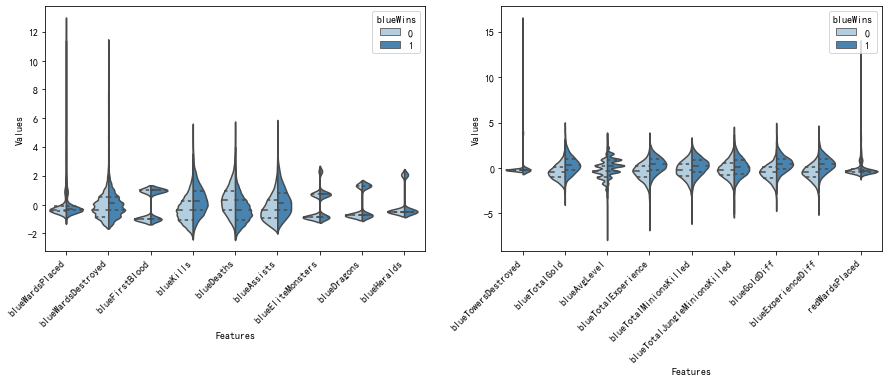

In [14]:
data = x
y = df.blueWins
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# 绘制小提琴图
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# 绘制小提琴图
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True, 
               inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

小提琴图 (Violin Plot)是用来展示多组数据的分布状态以及概率密度。这种图表结合了箱形图和密度图的特征，主要用来显示数据的分布形状。

从图中我们可以看出：

- 击杀英雄数量越多更容易赢，死亡数量越多越容易输（bluekills与bluedeaths左右的区别）。
- 助攻数量与击杀英雄数量形成的图形状类似，说明他们对游戏结果的影响差不多。
- 一血的取得情况与获胜有正相关，但是相关性不如击杀英雄数量明显。
- 经济差与经验差对于游戏胜负的影响较小。
- 击杀野怪数量对游戏胜负的影响并不大。


In [15]:
data

,blueWins,Features,Values
0,0,blueTowersDestroyed,-0.210428
1,0,blueTowersDestroyed,-0.210428
2,0,blueTowersDestroyed,-0.210428
3,0,blueTowersDestroyed,-0.210428
4,0,blueTowersDestroyed,-0.210428
...,...,...,...
88906,1,redWardsPlaced,1.280354
88907,1,redWardsPlaced,-0.561723
88908,0,redWardsPlaced,-0.453365
88909,0,redWardsPlaced,2.363929
